# Microenvironmental factors in cell segregation and heterogeneity in breast cancer development
## Microarray for genetic networks
### Breast cancer 
#### By Roberto Romero, IIMAS-UNAM

In [1]:
using Plots,PyPlot

## Dinamical system

\begin{equation}
    \frac{d x_i}{d t}= \alpha_i y_i(1-x_i)  +R_i(x,\lambda,\delta) -\mu_i x_i + \sum_j x_iH_j(x,\beta,\nu,\gamma),
\end{equation}
where

\begin{equation}
    H_j(x,\beta,\nu,\gamma)=\beta_j\frac{(\nu_j x_j)^{\gamma_j}}{k_j + (\nu_j x_j)^{\gamma_j}}
\end{equation}
and  $R_i$ is the auto interaction written as
\begin{equation}
    R_i(x,\lambda,\delta)=
    \begin{cases}
     \lambda_i \frac{x_i}{\delta_i + x_i}, ~~~\mathrm{positive}\\
     \lambda_i \frac{\delta_i}{\delta_i + x_i}, ~~~\mathrm{negative}\\
    \end{cases}
    \end{equation}
    
\begin{equation}
    \frac{d x_i}{d t}= y_i(1-x_i)  +R_i(x,\lambda,\delta) -\mu_i x_i + \sum_j x_iH_j(x,\beta,\nu,\gamma),
\end{equation}



    

\begin{equation}
    \frac{d x_i}{d t}= \alpha_i(\frac{y_i}{(\eta_{0_i} -\eta_{i}) } -1)(1-x_i) + R_i(x,\lambda,\delta) -\mu_i x_i + \sum_j x_iH_j(x,\beta,\nu,\gamma),
\end{equation}



In [10]:
function DS(Y0,η0,G0)
    #******** List of parameter
α1 = -1;  β1 = 9.0;  μ1 = 0.2;  v1 = 1.5;  γ1 = 6;  K1 = 0.5;
α2 = -1;  β2 = 0.2;   μ2 = 0.2;  v2 = 1;    γ2 = 1;  K2 = 0.5;
α3 = -1;  β3 = 0.2;   μ3 = 0.2;  v3 = 1;    γ3 = 1;  K3 = 0.5;
α4 = -1;  β4 = 0.2;   μ4 = 0.2;  v4 = 1;    γ4 = 3;  K4 = 0.5;
α5 = 1;  β5 = 20.0;  μ5 = 0.2;  v5 = 1;    γ5 = 1;  K5 = 0.5;
α6 = 1;  β6 = 4.0;   μ6 = 0.2;  v6 = 1.2;  γ6 = 4;  K6 = 0.5;
α7 = -1;  β7 = 0.0;   μ7 = 0.2;  v7 = 1;    γ7 = 3;  K7 = 0.5;
α8 = 1;  β8 = 0.2;   μ8 = 0.2;  v8 = 1;    γ8 = 1;  K8 = 0.5;
α9 = 1;  β9 = 3.0;   μ9 = 0.2;  v9 = 0.5;  γ9 = 2;  K9 = 0.5;
α10 = 1; β10 = 4.0;  μ10 = 0.2; v10 = 1;   γ10 = 2; K10 = 0.5;
    
vy5 = 0.5; γy5 = 1;  Ky5 = .5;
vy10 = 1;  γy10 = 1; Ky10 = 5;

λ0 = 0.4; δ0 = 1;
λ1 = 0.4; δ1 = 0.1;
    
    #******** 
y1  = Y0[1];  # TP53,   stress, oxygen                   # oxygen
y2  = Y0[2];  # ATR,                                     # estrogens
y3  = Y0[3];  # ATM,                                     # estrogens
y4  = Y0[4];  # BRCA1, Methylation --->                  # estrogens
y5  = Y0[5];  # HER2, estrogens, growth factor, glucose  # estrogens
y6  = Y0[6];  # MDM2, phosphorylation rates---->         # oxygen
y7  = Y0[7];  # CHEK1                                    # estrogens
y8  = Y0[8];  # AKT1                                     # oxygen
y9  = Y0[9];  # P21                                      # oxygen
y10 = Y0[10]; # CDK2                                     # estrogens
    #***********

    DT = 3600;  # Final time interaction
    dt = 0.001; # time step

# Variable Initiation    
x1 = zeros(DT); x2 = zeros(DT); x3 = zeros(DT); x4 = zeros(DT); x5 = zeros(DT); 
x6 = zeros(DT); x7 = zeros(DT); x8 = zeros(DT); x9 = zeros(DT); x10 = zeros(DT); 
x0 = zeros(DT);    

# Variable initial conditions  
x1[1] = G0[1]; x2[1] = G0[2]; x3[1] = G0[3]; x4[1] = G0[4]; x5[1] = G0[5]; 
x6[1] = G0[6]; x7[1] = G0[7]; x8[1] = G0[8]; x9[1] = G0[9]; x10[1] = G0[10];
# Environment initial conditions   
η1 = η0[1]; η2 = η0[2]; η3 = η0[3]; η4 = η0[4]; η5 = η0[5]; 
η6 = η0[6]; η7 = η0[7]; η8 = η0[8]; η9 = η0[9]; η10 = η0[10];     
    
   #*********** Dynamical system       
    
    for i=1:DT-1
    x0[i+1]  = dt*i;    
    x1[i+1]  = x1[i]  + dt*(  α1*(y1/η1 - 1)*(1 - x1[i])  + β2*x1[i]*((v2*x2[i])^γ2/(K2 + (v2*x2[i])^γ2))  + β4*x1[i]*((v4*x4[i])^γ4/(K4 + (v4*x4[i])^γ4)) - β5*x1[i]*((v5*x5[i])^γ5/(K5 + (v5*x5[i])^γ5)) - β6*x1[i]*((v6*x6[i])^γ6/(K6 + (v6*x6[i])^γ6)) +  β8*x1[i]*((v8*x8[i])^γ8/(K8 + (v8*x8[i])^γ8)) - β9*x1[i]*((v9*x9[i])^γ9/(K9 + (v9*x9[i])^γ9)) - μ1*x1[i]);
    x2[i+1]  = x2[i]  + dt*(  α2*(y2/η2 - 1)*(1 - x2[i])  + β4*x4[i]*((v4*x4[i])^γ4/(K4 + (v4*x4[i])^γ4))  - μ2*x2[i]);
    x3[i+1]  = x3[i]  + dt*(  α3*(y3/η3 - 1)*(1 - x3[i])  + β1*x3[i]*((v1*x1[i])^γ1/(K1 + (v1*x1[i])^γ1))  - μ3*x3[i]);
    x4[i+1]  = x4[i]  + dt*(  α4*(y4/η4 - 1)*(1 - x4[i])  + β2*x4[i]*((v2*x2[i])^γ2/(K2 + (v2*x2[i])^γ2))  - β8*x4[i]*((v8*x8[i])^γ8/(K8 + (v8*x8[i])^γ8)) - β10*x4[i]*((v10*x10[i])^γ10/(K10 + (v10*x10[i])^γ10)) - μ4*x4[i]);
    x5[i+1]  = x5[i]  + dt*(  α5*(y5/η5 - 1)*(1 - x5[i])  + λ0*(x5[i]/(δ0 + x5[i]))*((vy5*y5)^γy5/(Ky5     + (vy5*y5)^γy5)) - μ5*x5[i]);
    x6[i+1]  = x6[i]  + dt*(  α6*(y6/η6 - 1)*(1 - x6[i])  + β1*x6[i]*((v1*x1[i])^γ1/(K1 + (v1*x1[i])^γ1))  + β3*x6[i]*((v3*x3[i])^γ3/(K3 + (v3*x3[i])^γ3)) + β8*x6[i]*((v8*x8[i])^γ8/(K8 + (v8*x8[i])^γ8)) - β2*x6[i]*((v2*x2[i])^γ2/(K2 + (v2*x2[i])^γ2)) - μ6*x6[i]);
    x7[i+1]  = x7[i]  + dt*(  α7*(y7/η7 - 1)*(1 - x7[i])  + β2*x7[i]*((v2*x2[i])^γ2/(K2 + (v2*x2[i])^γ2))  + β4*x7[i]*((v4*x4[i])^γ4/(K4 + (v4*x4[i])^γ4)) - β8*x7[i]*((v8*x8[i])^γ8/(K8 + (v8*x8[i])^γ8)) - μ7*x7[i]); 
    x8[i+1]  = x8[i]  + dt*(  α8*(y8/η8 - 1)*(1 - x8[i])  + β9*x8[i]*((v9*x9[i])^γ9/(K9 + (v9*x9[i])^γ9))  - μ8*x8[i]);
    x9[i+1]  = x9[i]  + dt*(  α9*(y9/η9 - 1)*(1 - x9[i])  - β1*x9[i]*((v1*x1[i])^γ1/(K1 + (v1*x1[i])^γ1))  + β5*x9[i]*((v5*x5[i])^γ5/(K5 + (v5*x5[i])^γ5)) - μ9*x9[i]);
    x10[i+1] = x10[i] + dt*(α10*(y10/η10 - 1)*(1 - x10[i]) + β9*x10[i]*((v9*x9[i])^γ9/(K9 + (v9*x9[i])^γ9)) + λ1*(δ1/(δ1 + x10[i])) - μ10*x10[i]); 
    
    x1[i+1]  = max.(x1[i+1],0);  x1[i+1]  = min.(x1[i+1],1.0);
    x2[i+1]  = max.(x2[i+1],0);  x2[i+1]  = min.(x2[i+1],1.0);
    x3[i+1]  = max.(x3[i+1],0);  x3[i+1]  = min.(x3[i+1],1.0);
    x4[i+1]  = max.(x4[i+1],0);  x4[i+1]  = min.(x4[i+1],1.0);
    x5[i+1]  = max.(x5[i+1],0);  x5[i+1]  = min.(x5[i+1],1.0);    
    x6[i+1]  = max.(x6[i+1],0);  x6[i+1]  = min.(x6[i+1],1.0);
    x7[i+1]  = max.(x7[i+1],0);  x7[i+1]  = min.(x7[i+1],1.0);
    x8[i+1]  = max.(x8[i+1],0);  x8[i+1]  = min.(x8[i+1],1.0);
    x9[i+1]  = max.(x9[i+1],0);  x9[i+1]  = min.(x9[i+1],1.0);
    x10[i+1] = max.(x10[i+1],0); x10[i+1] = min.(x10[i+1],1.0);   
    end

    return  [x1[end] x2[end] x3[end] x4[end] x5[end] x6[end] x7[end] x8[end] x9[end] x10[end]]
    
end

DS (generic function with 1 method)

In [61]:
# Gene conditions
# random levels
G0r = rand(10);
#normal levels
G0n = [1 1 1 1 0 0 1 0 0 0];
#      TP53 ATR ATM  BRCA1 HER2 MDM2 CHEK1 AKT1 P21 CDK2
#cancer levels
G0c = [0 0 0 0 0 1 0 1 1 1];
#      TP53 ATR ATM  BRCA1 HER2 MDM2 CHEK1 AKT1 P21 CDK2
#pre-cancer levels
G0p = [0.5 0.3 0.9 0.8 0.5 0.9 0.4 0.9 0.6 0.5];
#      TP53 ATR ATM  BRCA1 HER2 MDM2 CHEK1 AKT1 P21 CDK2


# Code for  figure 3A

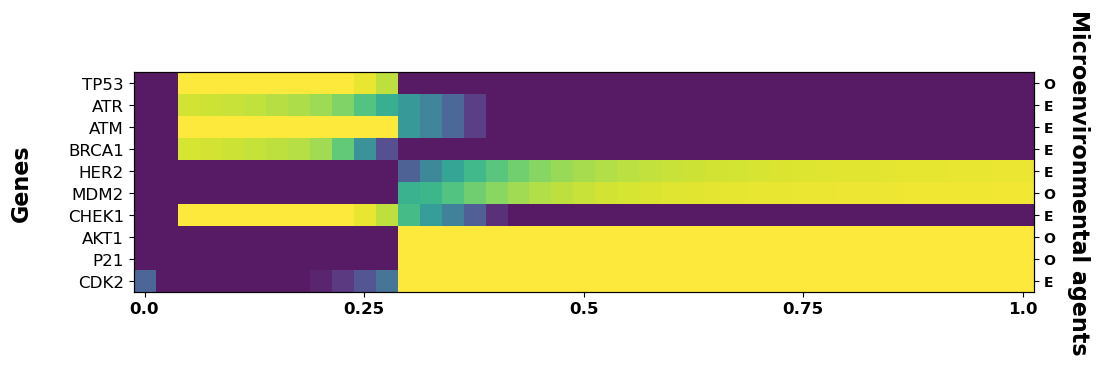

(-0.5, 40.5, 9.5, -0.5)

In [65]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
η0 = [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]*0.25; #Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

########
#  Plot  #
##########
fig = figure(figsize=(10,10))
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
xlabels = [0,10,20,30,40];
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)


################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
ylabel("Genes",fontdict=font2,rotation=90,labelpad=25,fontsize=16,fontweight=1000)

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting

#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")

#fig.savefig("Figure3A.png",bbox_inches="tight")

# Code for figure 3B

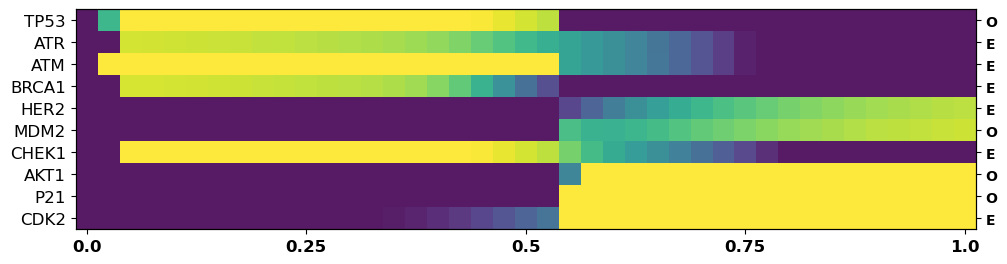

(-0.5, 40.5, 9.5, -0.5)

In [34]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
η0 = [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]*0.5; #Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

########
#  Plot  #
##########
fig = figure(figsize=(10,10))
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)


################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")

#fig.savefig("Figure2B.png",bbox_inches="tight")

# Code for figure 3C

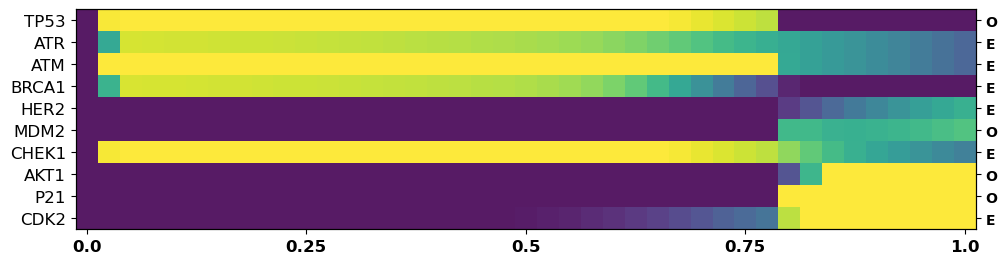

(-0.5, 40.5, 9.5, -0.5)

In [35]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
η0 = [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]*0.75; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

########
#  Plot  #
##########
fig = figure(figsize=(10,10))
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)


################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")

#fig.savefig("Figure2C.png",bbox_inches="tight")

# Code for figure 4

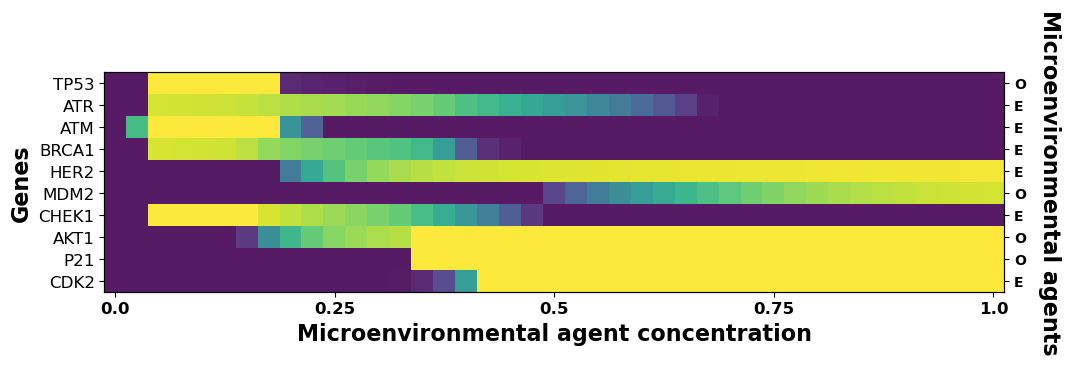

(-0.5, 40.5, 9.5, -0.5)

In [37]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
η0 = [0.5 0.75 0.25 0.75 0.25 0.75 0.5 0.20 0.5 0.80]*0.6;#Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)


################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")

#fig.savefig("Figure3.png",bbox_inches="tight")

# Code for figure  S19A

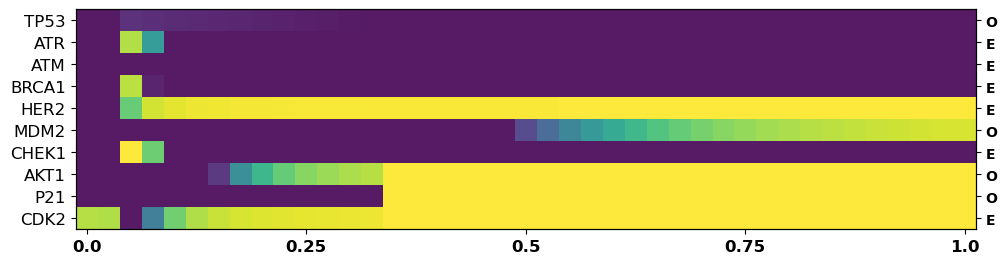

(-0.5, 40.5, 9.5, -0.5)

In [48]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.1;
η0 = [0.5 0.75*ηn 0.25*ηn 0.75*ηn 0.25*ηn 0.75 0.5*ηn 0.20 0.5 0.80*ηn]*0.6; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)

################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting

#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure14A.png",bbox_inches="tight")

# Code for figure S19B

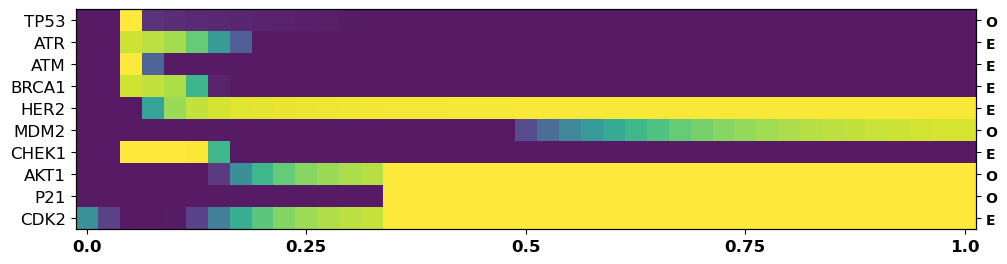

(-0.5, 40.5, 9.5, -0.5)

In [49]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.25;
η0 = [0.5 0.75*ηn 0.25*ηn 0.75*ηn 0.25*ηn 0.75 0.5*ηn 0.20 0.5 0.80*ηn]*0.6;# Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure14B.png",bbox_inches="tight")


# Code for figure S19C

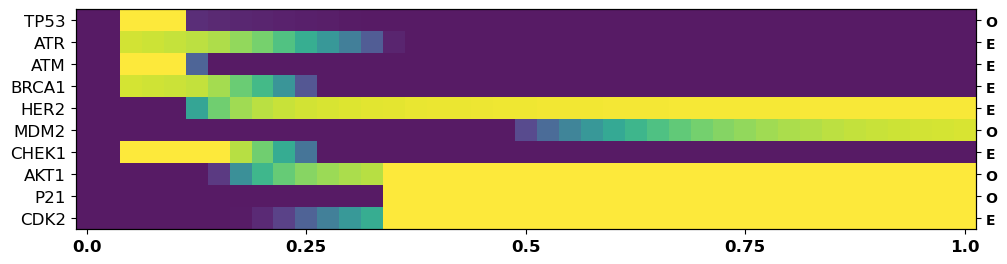

(-0.5, 40.5, 9.5, -0.5)

In [50]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.5;
η0 = [0.5 0.75*ηn 0.25*ηn 0.75*ηn 0.25*ηn 0.75 0.5*ηn 0.20 0.5 0.80*ηn]*0.6;# Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)


################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure14C.png",bbox_inches="tight")

# Code for figure S19D

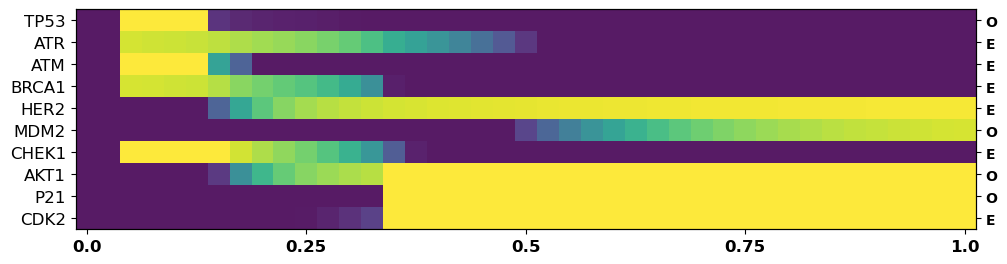

(-0.5, 40.5, 9.5, -0.5)

In [51]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.75;
η0 = [0.5 0.75*ηn 0.25*ηn 0.75*ηn 0.25*ηn 0.75 0.5*ηn 0.20 0.5 0.80*ηn]*0.6;# Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure14D.png",bbox_inches="tight")

# Code for figure S19E

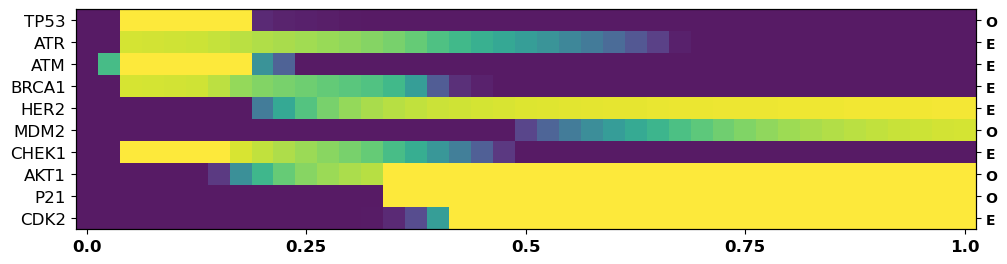

(-0.5, 40.5, 9.5, -0.5)

In [52]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 1.0;
η0 = [0.5 0.75*ηn 0.25*ηn 0.75*ηn 0.25*ηn 0.75 0.5*ηn 0.20 0.5 0.80*ηn]*0.6;# Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure14E.png",bbox_inches="tight")

# Code for figure S20A

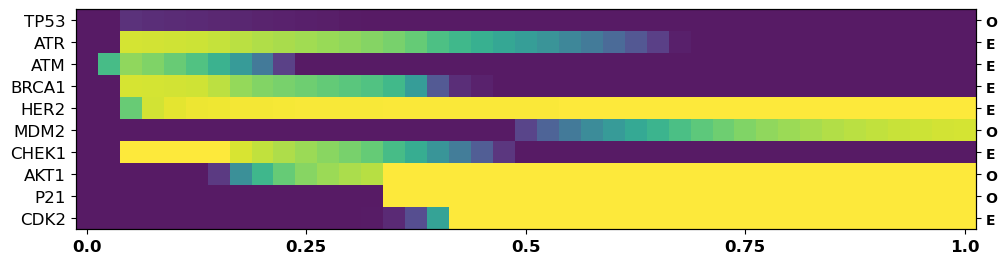

(-0.5, 40.5, 9.5, -0.5)

In [53]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.1;
η0 = [0.5 0.75 0.25 0.75 0.25*ηn 0.75 0.5 0.20 0.5 0.80]*0.6;# Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure15A.png",bbox_inches="tight")

# Code for figure  S20B

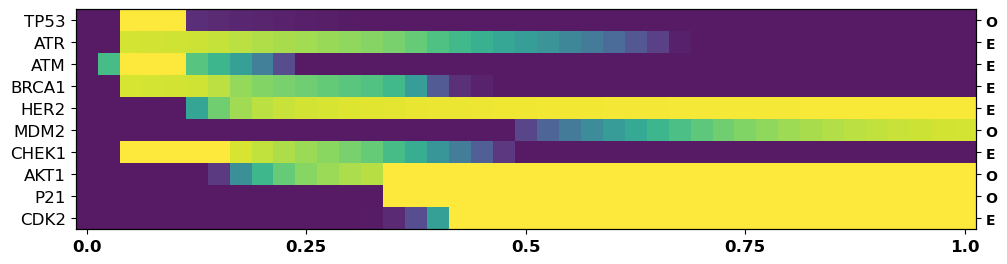

(-0.5, 40.5, 9.5, -0.5)

In [54]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 0.5;
η0 = [0.5 0.75 0.25 0.75 0.25*ηn 0.75 0.5 0.20 0.5 0.80]*0.6; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure15B.png",bbox_inches="tight")

# Code for figure S20C

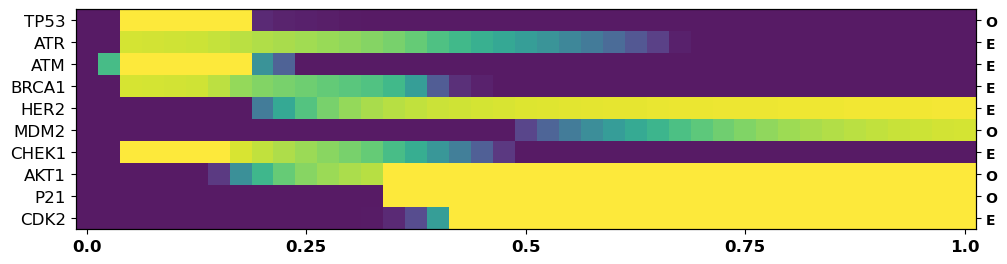

(-0.5, 40.5, 9.5, -0.5)

In [55]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 1.0;
η0 = [0.5 0.75 0.25 0.75 0.25*ηn 0.75 0.5 0.20 0.5 0.80]*0.6; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure15C.png",bbox_inches="tight")

# Code for figure S20D

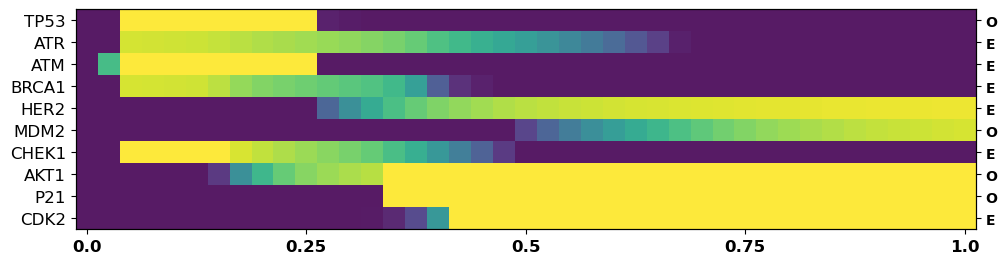

(-0.5, 40.5, 9.5, -0.5)

In [56]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 1.5;
η0 = [0.5 0.75 0.25 0.75 0.25*ηn 0.75 0.5 0.20 0.5 0.80]*0.6; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure15D.png",bbox_inches="tight")

# Code for  figure S20E

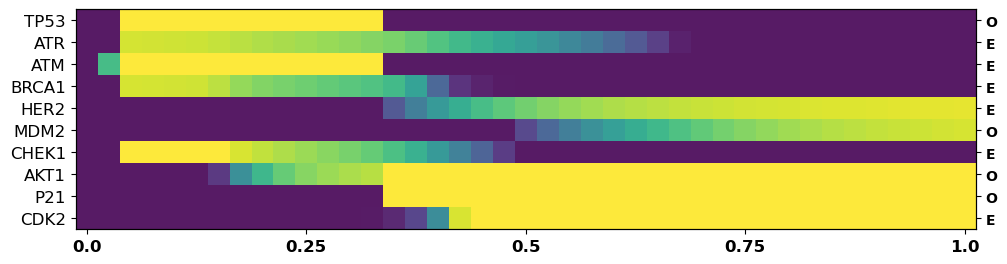

(-0.5, 40.5, 9.5, -0.5)

In [57]:
Y0 = [0.95 0.95 0.95 0.95 -0.8 0.1 1.95 -0.8 -0.8 0.1]; # wild type
ηn = 2.0;
η0 = [0.5 0.75 0.25 0.75 0.25*ηn 0.75 0.5 0.20 0.5 0.80]*0.6; # Threshold condition
G1 = DS(Y0,η0,G0r);
for k=1:40 
    Y0 = [Y0; k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40 k/40];
    G1 =[G1; DS(Y0[k,:],η0,G0n)];
end

##########
#  Plot  #
##########
fig = figure(figsize=(10,10))
#p = PyPlot.plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
p = PyPlot.imshow(G1', cmap=ColorMap("viridis"),alpha=0.9) # Plot a basic line
#colorbar()
ax = gca()
#PyPlot.title("Multi-axis Plot")
xlabels = [0,10,20,30,40]
ylabels = [0,1,2,3,4,5,6,7,8,9];
xtickss = [0,10,20,30,40]/40;
#ytickss = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
ytickss = ["TP53","ATR","ATM","BRCA1","HER2","MDM2","CHEK1","AKT1","P21","CDK2"]
#ytickss = ["x10","x9","x8","x7","x6","x5","x4","x3","x2","x1"]
PyPlot.xticks(xlabels, xtickss,fontsize=12,fontweight=1000)
PyPlot.yticks(ylabels, ytickss,fontsize=12)

#PyPlot.xlabel("Microenvironmental agent concentration",fontsize=16,fontweight=1000)
#PyPlot.ylabel("Genes",fontsize=16,fontweight=1000)



################
#  Other Axes  #
################
new_position = [1.0;1.0;0.9;0.22] # Position Method 2
ax.set_position(new_position) # Position Method 2: Change the size and position of the axis
#fig.subplots_adjust(right=0.85) # Position Method 1

ax2 = ax.twinx() # Create another axis on top of the current axis
font2 = Dict("color"=>"black")
#ylabel("Microenvironmental agents",fontdict=font2,rotation=270,labelpad=25,fontsize=16,fontweight=1000)
p = PyPlot.imshow(G1', cmap=ColorMap("jet"),alpha=0.0) # Plot a basic line
ax2.set_position(new_position) # Position Method 2
setp(ax2.get_yticklabels(),color="black",fontweight=1000) # Y Axis font formatting


#ytickss = ["Oxygen","Estrogen","Estrogen","Estrogen","Estrogen","Oxygen","Estrogen","Oxygen","Oxygen","Estrogen"]
ytickss = ["O","E","E","E","E","O","E","O","O","E"]
PyPlot.yticks(ylabels, ytickss,fontsize=10,fontweight=1000)

axis("tight")


#fig.savefig("Figure15E.png",bbox_inches="tight")